## SVM Checker

In [160]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=10, num_features=2, grid_size=20, sigma = 0.1):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear())
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.09, 0.9],
        extend='both',
        alpha=0.5
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[-1.99785147  2.48436697]
 [-0.83359058  1.31709629]
 [ 0.69023498 -1.363959  ]
 [ 0.01698302 -0.54026885]
 [-0.00427714  1.02470829]
 [-0.9214322  -2.00187191]
 [-0.56613588 -0.15811235]
 [ 0.09085938 -0.6929283 ]
 [ 1.58270382  0.65238768]
 [ 0.72707141  0.37486789]]
     pcost       dcost       gap    pres   dres
 0: -2.4926e+00 -4.9569e+00  3e+01  5e+00  2e+00
 1: -8.4078e-01 -3.8062e+00  7e+00  9e-01  3e-01
 2: -1.1731e+00 -1.9877e+00  8e-01  7e-16  4e-15
 3: -1.4603e+00 -1.6068e+00  1e-01  2e-16  1e-15
 4: -1.5716e+00 -1.5875e+00  2e-02  5e-16  7e-16
 5: -1.5811e+00 -1.5813e+00  2e-04  3e-16  3e-16
 6: -1.5812e+00 -1.5812e+00  2e-06  5e-16  1e-16
 7: -1.5812e+00 -1.5812e+00  2e-08  3e-16  1e-16
Optimal solution found.


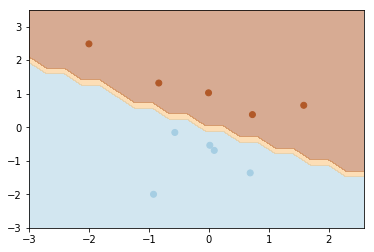

In [161]:
example()